In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize
from math import pi
import warnings
warnings.filterwarnings('ignore')

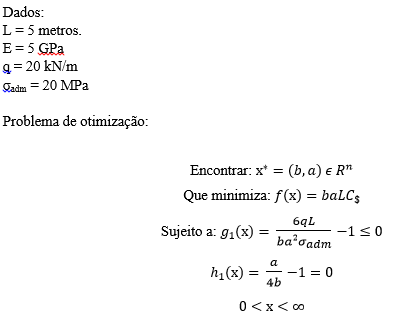

In [2]:
# Parâmetros do problema:
L = 5
E = 5e9
q = 20e3
sigma = 20e6

# Parâmetros do algoritmo:
xi = [0.2, 0.4] # Ponto de partida
e1 = 1e-2       # Tolerância para o algoritmo de otimização
e2 = 1e-4       # Tolerância para o critério de parada do processo (mudança no valor da função de objetivo penalizada)
r = 1           # Parâmetro inicial de penalização
c = 1.25        # Fator de atualização de r
imax = 1e3      # Número máximo de iterações

xh = [xi] # Para armazenar o histórico de x

# Função objetivo:
def f(x):
    return x[0] * x[1] * L

# Restrições de desigualdade:
def g(x):
    return ((6 * q * L)/(x[0] * x[1]**2 * sigma) - 1)

# Restrições de igualdade:
def h(x):
    return x[1]/(4 * x[0]) - 1

# Função Ω:
def omega(x, r):
    return r * (max((g(x)), 0)**2 + h(x)**2)

p = lambda x: f(x) + omega(x, r) # Função de penalização

# Início do processo iterativo:
i = 0
nit = 0
nfev = 0

while True:
    i += 1
    if i > imax:
        print('Número máximo de iterações excedido!')
    
    min_p = minimize(p, xi, method='BFGS',
                     tol=e1, options={'maxiter':imax}) # Utiliza o método BFGS
    r *= c                                             # Atualiza o valor de r
    x = min_p.x                                        # O valor de x para a próxima iteração é o ótimo encontrado na atual
    nit += min_p.nit                                   # Cumulativo de iterações
    nfev += min_p.nfev                                 # Cumulativo de avaliações de funções
    
    # Critério de parada:
    if abs(p(x) - p(xh[-1])) < e2:
        xh.append([x[0], x[1]])
        print(f'Número de iterações para φ(x): {i}')
        print(f'Cumulativo de iterações para φ(x): {nit}')
        print(f'Cumulativo de avaliações de funções: {nfev}')
        print(f'Valor de f(x) no ponto ótimo: {round(f(x), 6)}')
        print(f'Valor de φ(x) no ponto ótimo: {round(p(x), 6)}')
        print(f'ε2 = {e2}')
        break
    
    xh.append([x[0], x[1]])
    
print(f'Ponto inicial: {xi}; ótimo encontrado: {x}')

Número de iterações para φ(x): 16
Cumulativo de iterações para φ(x): 145
Cumulativo de avaliações de funções: 2124
Valor de f(x) no ponto ótimo: 0.303213
Valor de φ(x) no ponto ótimo: 0.303773
ε2 = 0.0001
Ponto inicial: [0.2, 0.4]; ótimo encontrado: [0.12302015 0.49294796]


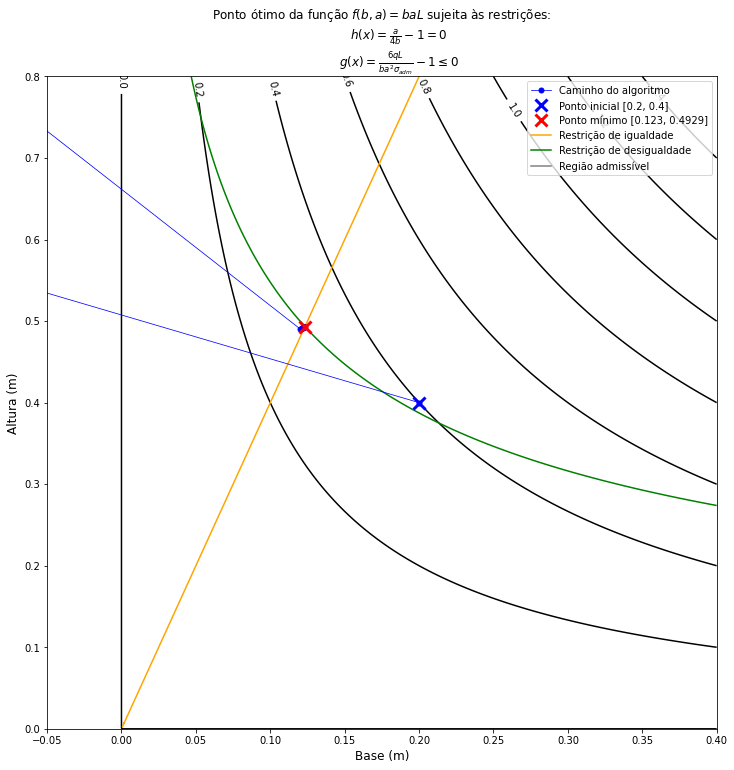

In [3]:
#### Plot:
x1h = [xh[i][0] for i in range(len(xh))]
x2h = [xh[i][1] for i in range(len(xh))]

plt.rc('figure', figsize=(12, 12))

valores = 1000
xx = np.linspace(-0.05, 0.4, valores)
yy = np.linspace(0, 0.8, valores)
x1, x2 = np.meshgrid(xx, yy)

f = x1 * x2 * L
h = x2/(4 * x1) - 1
g = (6 * q * L)/(x1 * x2**2 * sigma) - 1

fig, ax = plt.subplots()
title = (r'''Ponto ótimo da função $f(b, a) = baL$ sujeita às restrições:
         $h(x) = \frac{a}{4b}-1=0$
         $g(x) = \frac{6qL}{ba^2\sigma_{adm}}-1\leq0$''')
CS = ax.contour(xx, yy, f, 10, colors='k')
ax.clabel(CS, inline=0.5, fontsize=10)
ax.set_title(title)

string = f'Ponto mínimo [{round(x[0], 4)}, {round(x[1], 4)}]'
    
plt.plot(x1h, x2h, marker='.', lw=0.75, ms=10, label='Caminho do algoritmo', c='blue')
plt.plot(xi[0], xi[1], marker='x', ls='', ms=12, label=f'Ponto inicial {xi}', c='blue', mew=3)
plt.plot(xh[-1][0], xh[-1][1], marker='x', ls='', ms=12, label=string, c='r', mew=3)
plt.plot(0, 0, label='Restrição de igualdade', c='orange')
plt.plot(0, 0, label='Restrição de desigualdade', c='g')
plt.plot(0, 0, label='Região admissível', c='gray')
plt.contour(xx, yy, h, 0, colors='orange')
plt.contour(xx, yy, g, 0, colors='g')
plt.xlabel('Base (m)', fontsize=12)#, fontweight='bold')
plt.ylabel('Altura (m)', fontsize=12)#, fontweight='bold')
plt.xlim((-0.05, 0.4))
plt.ylim((0, 0.8))

plt.legend()

plt.show()